In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


dropout_baseUrl = "https://api.ed.gov/data/mbk-highschool-dropout?api_key=tyfjxUQDhs4fn3zihRglqRofAOE3DfdFzibkSPIL"
dropout_perPage = "&per_page=50000"

dropoutData = requests.get(dropout_baseUrl + dropout_perPage).json()

dropoutData


{'pagination': {'count': 360, 'page': 1, 'pages': 1, 'per_page': 50000},
 'resources': [{'Characteristic': 'Total',
   'Count': '6234',
   'Note on Count': 'Data are based on samples surveys of the civilian noninstitutional population. Race categories exclude persons of Hispanic ethnicity. Data for Pacific Islanders and  persons of two or more races collected separately after 2002. Beginning in 2005, standard errors were computed using replicate weights, which produced more precise values than the methodology used in prior years.',
   'Note on Percent': 'Data are based on samples surveys of the civilian noninstitutional population. Race categories exclude persons of Hispanic ethnicity. Data for Pacific Islanders and  persons of two or more races collected separately after 2002. Beginning in 2005, standard errors were computed using replicate weights, which produced more precise values than the methodology used in prior years.',
   'Percentage': '23.5',
   'Race/Ethnicity ': None,
   'S

In [2]:
length = len(dropoutData['resources'])
length

360

In [3]:
year=[]
sex=[]
percentage=[]

for a in range(length):
    year.append(str(dropoutData['resources'][a]['Year']))
    sex.append(str(dropoutData['resources'][a]['Sex']))
    percentage.append(str(dropoutData['resources'][a]['Percentage']))

    
dropoutdf1 = pd.DataFrame({'Year': year, 'Sex': sex, 'Percentage': percentage})
dropoutdf1.head(45)

,Year,Sex,Percentage
0,2000,None,23.5
1,2001,None,23.8
2,2002,None,23.7
3,2003,None,22.7
4,2004,None,22.1
5,2005,None,21.9
6,2006,None,21.2
7,2007,None,21.1
8,2008,None,20
9,2009,None,19.4


In [28]:
dropoutdf1_male = dropoutdf1.loc[(dropoutdf1['Sex']=='Male') & (dropoutdf1['Year'] <= '2012')]
dropoutdf1_male['Percentage'] = pd.to_numeric(dropoutdf1_male['Percentage'] )
dropoutdf1_male

C:\Users\Wasif Parvez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Sex,Percentage
15,2000,Male,26.1
16,2001,Male,26.6
17,2002,Male,25.9
18,2003,Male,25.0
19,2004,Male,25.0
20,2005,Male,24.1
21,2006,Male,23.6
22,2007,Male,23.5
23,2008,Male,21.9
24,2009,Male,21.7


In [22]:
dropoutdf1_male.index = dropoutdf1_male.index.astype(str)
dropoutdf1_male = dropoutdf1_male[-1::] 

dropoutdf1_male

,Year,Sex,Percentage


<function matplotlib.pyplot.show(*args, **kw)>

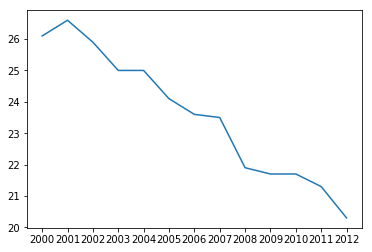

In [29]:
plt.plot(dropoutdf1_male['Year'],dropoutdf1_male['Percentage'])
plt.show

In [31]:
dropoutdf1_female = dropoutdf1.loc[(dropoutdf1['Sex']=='Female') & (dropoutdf1['Year'] <= '2012')]
dropoutdf1_female['Percentage'] = pd.to_numeric(dropoutdf1_female['Percentage'] )
dropoutdf1_female



#dropoutdf1_female = dropoutdf1.iloc[30:43]
#dropoutdf1_female

C:\Users\Wasif Parvez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Sex,Percentage
30,2000,Female,20.9
31,2001,Female,21.1
32,2002,Female,21.5
33,2003,Female,20.4
34,2004,Female,19.2
35,2005,Female,19.6
36,2006,Female,18.8
37,2007,Female,18.7
38,2008,Female,18.0
39,2009,Female,17.1


<function matplotlib.pyplot.show(*args, **kw)>

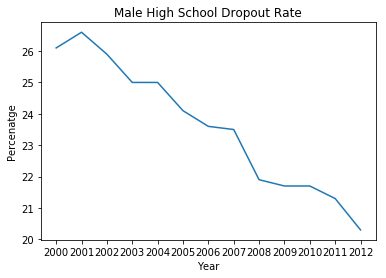

In [30]:
plt.plot(dropoutdf1_male['Year'],dropoutdf1_male['Percentage'])
plt.title('Male High School Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Percenatge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

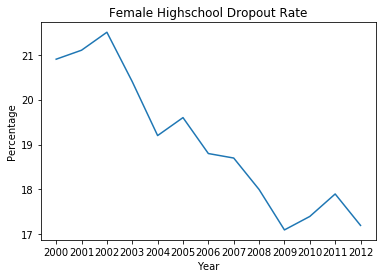

In [32]:
plt.plot(dropoutdf1_female['Year'],dropoutdf1_female['Percentage'])
plt.title('Female Highschool Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show

In [10]:
dropOutMale = dropoutdf1[dropoutdf1.Sex == 'Male']
dropOutMale.to_csv("dropOutMale_percentages.csv")

In [11]:
dropOutFemale = dropoutdf1[dropoutdf1.Sex == 'Female']
dropOutFemale.to_csv("dropOutFemale_percentages.csv")

<function matplotlib.pyplot.show(*args, **kw)>

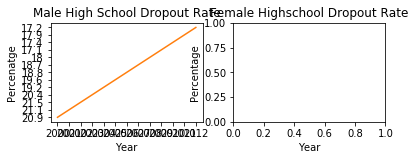

In [12]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(dropoutdf1_male.Year,dropoutdf1_male.Percentage)
plt.title('Male High School Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Percenatge')
plt.show

plt.plot(dropoutdf1_female.Year,dropoutdf1_female.Percentage)
plt.subplot(2,2,2)
plt.title('Female Highschool Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show
